<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/shapefile_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas



     |████████████████████████████████| 901kB 3.4MB/s 
     |████████████████████████████████| 9.8MB 39.1MB/s 
     |████████████████████████████████| 17.9MB 42.6MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=03172602732f1d8f2f51db964ac1539c2d2c3b1f123040a26b52767108c03835
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import geopandas as gp

In [0]:
#connecting google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
fname = 'drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp'

data = gp.read_file(fname)

In [0]:
data.head()



,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,gisobjid,gispropnum,global_id,jurisdicti,location,mapped,name311,nys_assemb,nys_senate,objectid,omppropid,parentid,permit,permitdist,permitpare,pip_ratabl,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19440801000000.00000,0.991,None,M,PLGD,20100106000000.00000,111,9,M-11,Abraham Lincoln Playground,100004131.0,M193,{5D62AD38-AE30-4E43-8DE0-E28780CD8E3C},DPR,5 Ave. and E. 135 St.,False,Abraham Lincoln Playground,70,30,5834.0,M193,M-11,Y,M-11,M-11,Yes,25,False,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,13,No,10037,POLYGON ((-73.93682693707335 40.81184552631012...
1,None,0.030,None,Q,PARK,20090423000000.00000,413,23,Q-13,Father Reilly Square,100000216.0,Q159,{12B62C23-3F42-418E-B059-F0B549D7FCEB},DPR/CDOT,"Winchester Blvd., 93 Ave., 220 St.",False,Father Reilly Square,33,14,6166.0,Q159,Q-13,Y,Q-13,Q-13,Yes,105,False,Father Reilly Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q159/,5,No,11428,POLYGON ((-73.73628053979716 40.72267578865961...
2,19360824000000.00000,0.911,2300 Ryer Avenue,X,PARK,20100106000000.00000,205,15,X-05,Slattery Playground,100004208.0,X085,{01AD9F2D-AD1B-4FBE-BB15-41DC9DC485FD},DPR,E. 183 St. bet. Valentine Ave. and Ryer,False,Slattery Playground,86,33,4792.0,X085,X-05,Y,X-05,X-05,Yes,46,False,Slattery Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X085/,15,No,10458,POLYGON ((-73.89825077067158 40.85693358482933...
3,19520206000000.00000,0.189,349 RODNEY STREET,B,PARK,20100106000000.00000,301,34,B-01,Rodney Playground Center,100003716.0,B223PD,{F14C1976-8BEC-49F1-A139-798EA720A52E},DPR,"Rodney St., S. 3 St., Borniquen Pl.",True,Rodney Playground Center,53,18,5124.0,B223PD,B-01,Y,B-01,B-01,Yes,90,False,Rodney Playground Center,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/B223PD/,7,No,11211,POLYGON ((-73.95533291494969 40.71042213200856...
4,19240403000000.00000,0.554,124 11 STREET,B,PARK,20110712000000.00000,306,39,B-06,Ennis Playground,100004454.0,B095,{B2FA7ABF-7ECB-4847-8979-0DD773A819F8},DPR,"11 St., 12 St. bet. 2 Ave. and 3 Ave.",False,Ennis Playground,51,25,5456.0,B095,B-06,Y,B-06,B-06,Yes,78,False,Ennis Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B095/,7,No,11215,POLYGON ((-73.99424820391394 40.67057586455565...


'geometry'

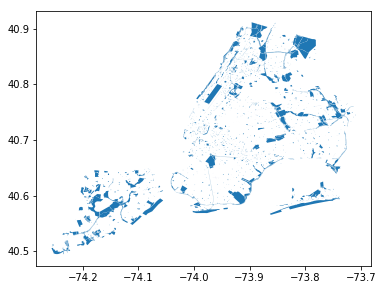

In [0]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])


data.plot(ax=ax) #put the data to the plot that has been created 把data画在前面的plt.subplots生成的空白格内

data.geometry.name



In [0]:
zones = gp.GeoDataFrame.from_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

def getXY(pt):
    return (pt.x, pt.y)
  
centroidseries = zones['geometry'].centroid
# 拿到文件内geometry这一列的集合图形的的重心坐标: POLYGON(多边形的意思) ((-73.93682693707335 40.81184552631012 xx.xxxx yy.yyyy ...)) : Point(-73.93718678520435 40.81219510551866)
centroidseries.head() 

centroidlist = map(getXY, centroidseries) #http://www.runoob.com/python/python-func-map.html ：python map(function, iterable)函数会根据提供的函数function对指定序列iterable做映射
# centroidseries = [POINT (-73.93718678520435 40.81219510551866), POINT (-73.73613278671245 40.72272187345229), ...]
# 于是参考前面定义的getXY function, centroidlist = [(-73.93718678520435 40.81219510551866), (-73.73613278671245 40.72272187345229), ...] 


list(centroidlist)[0] #这句话打印出来centroidlist里的元素，用来方便理解 https://stackoverflow.com/questions/1303347/getting-a-map-to-return-a-list-in-python-3-x


0    POINT (-73.93718678520435 40.81219510551866)
1    POINT (-73.73613278671245 40.72272187345229)
2    POINT (-73.89848043459958 40.85730590130652)
3    POINT (-73.95557068356273 40.71025582991545)
4     POINT (-73.9938198339316 40.67074024013655)
dtype: object

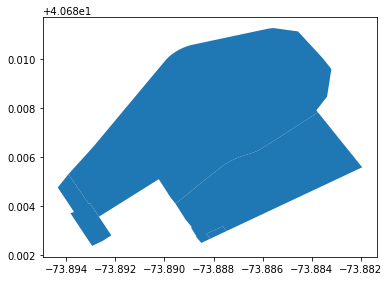

In [0]:

#1. get the centroid for each park



import geopandas as gpd
import random as rd
import math
import matplotlib.pyplot as plt
#GeoDataFrame creation
points = gpd.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")
points.head()
centroids = points['geometry'].centroid
centroids.head() #centroids 就是每个park的centroid的一个集合

#2. pick a random point and find all centroids within 0.005 degrees

randomPoint = centroids[(int)(rd.random()*len(centroids))] 
#random() 产生一个0-1之间的小数，然后乘以他的长度再转成整数int，centroids[这个整数] 就可以表示为这个centroids集合里面位于某个位置的元素

# 定义一个函数叫做计算点与点之间的距离： dis = （(a.x - b.x)的平方 + (a.y - b.y)的平方）再开根号 //勾股定理
def calculateDegreeDifference(a, b):
  return math.sqrt(math.pow(a.x-b.x, 2) + math.pow(a.y-b.y, 2))

centroidsTemp = centroids.copy() #复制出来一个临时temp的centroids，用来过滤出那些符合条件的点

for i in centroids.index: #这个遍历controids的for 语句也是我查出来的
  if(calculateDegreeDifference(centroids[i], randomPoint) >= 0.005):
    centroidsTemp = centroidsTemp.drop([i], axis=0) #如果满足两点之间距离不小于0.005， 然后就吧这些数据删掉, 也是我查出来的，搜： geopandas filter points

centroidsTemp # print and see how mant points includ in this dataset 打印出来看一下有多少点

#3. plot only those parks


fig, ax = plt.subplots(figsize=[6,6]) #重复上面的步骤画图
points = points[centroidsTemp.contains(points['geometry'].centroid)]    #这个在方括号[]里加上条件语句的也是我查出来的http://geopandas.org/mapping.html 里choropleth maps那一段

points.plot(ax=ax)




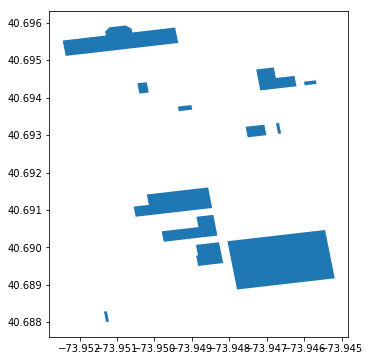

In [0]:
import matplotlib.pyplot as plt
import geopandas as gp


zones = gp.GeoDataFrame.from_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

def getXY(pt):
    return (pt.x, pt.y)
  
centroidseries = zones['geometry'].centroid
centroidseries.head() 

centroidlist = map(getXY, centroidseries) 
list(centroidlist)[0]

#1. get the centroid for each park
import geopandas as gpd
import random as rd
import math
import matplotlib.pyplot as plt
#GeoDataFrame creation
points = gpd.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")
points.head()
centroids = points['geometry'].centroid
centroids.head() 

#2. pick a random point and find all centroids within 0.005 degrees

randomPoint = centroids[(int)(rd.random()*len(centroids))] 

def calculateDegreeDifference(a, b):
  return math.sqrt(math.pow(a.x-b.x, 2) + math.pow(a.y-b.y, 2))

centroidsTemp = centroids.copy() 

for i in centroids.index: 
  if(calculateDegreeDifference(centroids[i], randomPoint) >= 0.005):
    centroidsTemp = centroidsTemp.drop([i], axis=0) # geopandas filter points

centroidsTemp # print and see how mant points includ in this dataset 

#3. plot only those parks


fig, ax = plt.subplots(figsize=[6,6]) 
points = points[centroidsTemp.contains(points['geometry'].centroid)]    #http://geopandas.org/mapping.html can find in choropleth maps

points.plot(ax=ax)

#========AX?


In [0]:
#4.as a bonus, see if you can convert the coordinates from lat/lon in degrees to New York State plane coordinates and find all park centroids within 200 feet or your point. (edited) 


import pyproj as proj
import matplotlib.pyplot as plt
import geopandas as gp

zones = gp.GeoDataFrame.from_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")


# setup your projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:27700') # use a locally appropriate projected CRS

# then cast your geographic coordinate pair to the projected system




In [0]:
import matplotlib.pyplot as plt
import geopandas as gp


zones = gp.GeoDataFrame.from_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

def getXY(pt):
    return (pt.x, pt.y)
  
centroidseries = zones['geometry'].centroid
centroidseries.head() 

centroidlist = map(getXY, centroidseries) 
list(centroidlist)[0]

#1. get the centroid for each park
import geopandas as gpd
import random as rd
import math
import matplotlib.pyplot as plt
#GeoDataFrame creation
points = gpd.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")
points.head()
centroids = points['geometry'].centroid
centroids.head() 

#2. pick a random point and find all centroids within 0.005 degrees

randomPoint = centroids[(int)(rd.random()*len(centroids))] 

def calculateDegreeDifference(a, b):
  return math.sqrt(math.pow(a.x-b.x, 2) + math.pow(a.y-b.y, 2))

centroidsTemp = centroids.copy() 

for i in centroids.index: 
  if(calculateDegreeDifference(centroids[i], randomPoint) >= 0.005):
    centroidsTemp = centroidsTemp.drop([i], axis=0) # geopandas filter points

centroidsTemp # print and see how mant points includ in this dataset 

#3. plot only those parks


fig, ax = plt.subplots(figsize=[6,6]) 
points = points[centroidsTemp.contains(points['geometry'].centroid)]    #http://geopandas.org/mapping.html can find in choropleth maps

points.plot(ax=ax)